In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,tiecorrect
from scipy.stats import f,f_oneway

In [ ]:
a = np.array([25, 25, 27, 30, 23, 20])
b = np.array([30, 30, 21, 24, 26, 28])
c = np.array([18, 30, 29, 29, 24, 26])

In [ ]:
print("a : ", a)
print("b : ", b)
print("c : ", c)

a :  [25 25 27 30 23 20]
b :  [30 30 21 24 26 28]
c :  [18 30 29 29 24 26]


In [ ]:
print("Avg(a) :",np.mean(a))
print("Avg(b) :",np.mean(b))
print("Avg(c) :",np.mean(c))

Avg(a) : 25.0
Avg(b) : 26.5
Avg(c) : 26.0


In [ ]:
ssb=(6*(25-25.83)**2)+(6*(26.5-25.83)**2)+(6*(26-25.83)**2)
print("ssb :",ssb)

ssb : 7.0002


In [ ]:
dof_b= 2

In [ ]:
msb = ssb/dof_b
print("msb : ",msb)

msb :  3.5001


In [ ]:
a-a.mean()

In [ ]:
ssw=np.sum((a-a.mean())**2)+np.sum((b-b.mean())**2)+np.sum((c-c.mean())**2)
print("ssw :",ssw)

ssw : 223.5


In [ ]:
dof_w = 15

In [ ]:
msw= ssw/dof_w
print("msw : ",msw)

msw :  14.9


In [ ]:
f_stat= msb/msw
print("f_stat : ",f_stat)

f_stat :  0.23490604026845638


In [ ]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3

p_value=1-f.cdf(0.234,dfn = 2, dfd=15)


print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

p_value :  0.7941969546170948
Interpretation : Fail to Reject Ho


In [ ]:
f_oneway(a,b,c)

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

In [ ]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3

f_stat,p_value=f_oneway(a,b,c)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.2348993288590604
p_value :  0.793504662732833
Interpretation : Fail to Reject Ho


In [ ]:
df=pd.read_csv("/content/aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

<Axes: xlabel='Product', ylabel='Income'>

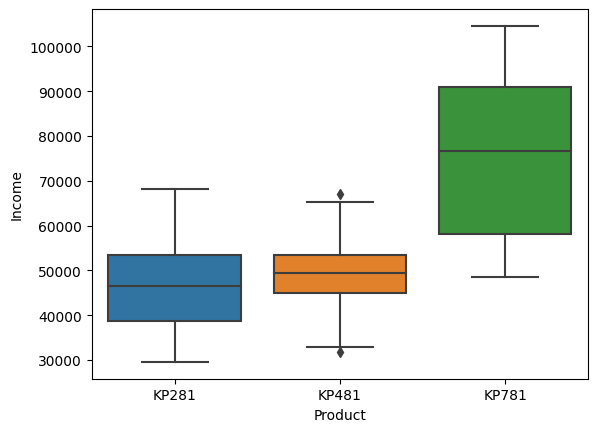

In [ ]:
sns.boxplot(x="Product",y="Income",data=df)

In [ ]:
df["Random_Group"] = np.random.choice(["g1","g2","g3"],size=len(df))

In [ ]:
df["Random_Group"].value_counts()

g3    62
g2    60
g1    58
Name: Random_Group, dtype: int64

<Axes: xlabel='Random_Group', ylabel='Income'>

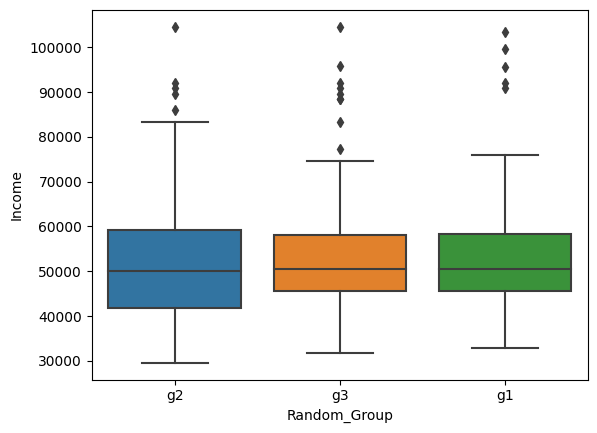

In [ ]:
sns.boxplot(x="Random_Group",y="Income",data=df)

In [ ]:
income_g1 = df.loc[df["Random_Group"]=="g1","Income"]
income_g2 = df.loc[df["Random_Group"]=="g2","Income"]
income_g3 = df.loc[df["Random_Group"]=="g3","Income"]

In [ ]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3 ( Atleast one of them is different)

f_stat,p_value=f_oneway(income_g1,income_g2,income_g3)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.3328005925084164
p_value :  0.7173607582223553
Interpretation : Fail to Reject Ho


In [ ]:
income_281 = df.loc[df["Product"]=="KP281","Income"]
income_481 = df.loc[df["Product"]=="KP481","Income"]
income_781 = df.loc[df["Product"]=="KP781","Income"]

In [ ]:
# Ho : mu1 = mu2 = mu3
# Ha : mu1 ! mu2 != mu3 ( Atleast one of them is different)

f_stat,p_value=f_oneway(income_281,income_481,income_781)
print("f_stat : ",f_stat)

print("p_value : ",p_value)
alpha = 0.05

if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  89.25903546601671
p_value :  1.5644991316342494e-27
Interpretation : Reject Ho


In [ ]:
print("Avg(income_281) :",np.mean(income_281))
print("Avg(income_481) :",np.mean(income_481))
print("Avg(income_781) :",np.mean(income_781))

Avg(income_281) : 46418.025
Avg(income_481) : 48973.65
Avg(income_781) : 75441.575


In [ ]:
print("Avg(income_g1) :",np.mean(income_g1))
print("Avg(income_g2) :",np.mean(income_g2))
print("Avg(income_g3) :",np.mean(income_g3))

Avg(income_g1) : 53741.706896551725
Avg(income_g2) : 52465.166666666664
Avg(income_g3) : 54912.82258064516


<Axes: xlabel='Income', ylabel='Density'>

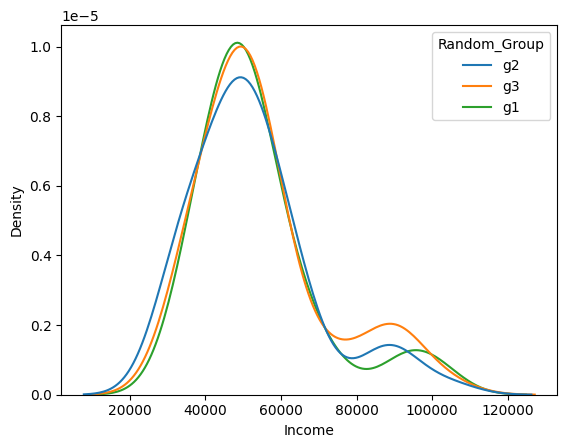

In [ ]:
sns.kdeplot(x="Income",hue="Random_Group",data=df)

<Axes: xlabel='Income', ylabel='Density'>

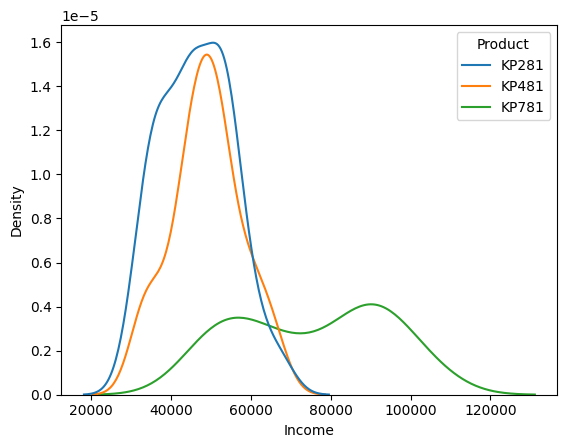

In [ ]:
sns.kdeplot(x="Income",hue="Product",data=df)